In [154]:

%matplotlib inline 
from IPython.display import clear_output
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import time
from scipy.stats import entropy
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns
# import scipy
# import seaborn as sns
# from matplotlib import pyplot as plt
# import matplotlib as mpl
# import math
# import gensim
# from itertools import repeat
# import gensim.downloader
# from sklearn.metrics.pairwise import cosine_similarity
# import statsmodels.api as sm
# # from gensim.models.fasttext import load_facebook_mode
import warnings
warnings.filterwarnings('ignore')


In [107]:
import os
import openai

In [108]:
def make_ratings_mat(grouped_ratings_df):
    
    mat = np.zeros((len(np.unique(grouped_ratings_df.prompt)),71))
    for i,con in enumerate(np.unique(grouped_ratings_df.prompt)):
        ds = grouped_ratings_df[grouped_ratings_df.prompt==con]
        mat[i,:] = ds.iloc[:,3].values


    mat = pd.DataFrame(mat, index =np.unique(grouped_ratings_df.prompt), columns = np.arange(mat.shape[1]) )
    cmeans = mat.mean().values
    return mat, cmeans

In [109]:
set_1_raw = pd.read_csv('../../data/uw71_set1_redo_raw.csv')
set_2_raw = pd.read_csv('../../data/uw71_set2_raw.csv')
set_3_raw = pd.read_csv('../../data/uw71_set3_raw.csv')
set1_grouped = set_1_raw.groupby(['concept','prompt','color_index']).response.agg(mean_rating = 'mean', se ='sem').reset_index()
set2_grouped = set_2_raw.groupby(['concept','prompt','color_index']).response.agg(mean_rating = 'mean', se ='sem').reset_index()
set3_grouped = set_3_raw.groupby(['concept','prompt','color_index']).response.agg(mean_rating = 'mean', se ='sem').reset_index()

ratings1,ratings_cmeans1= make_ratings_mat(set1_grouped)
ratings2,ratings_cmeans2= make_ratings_mat(set2_grouped)
ratings3,ratings_cmeans3= make_ratings_mat(set3_grouped)

concept_list = set1_grouped.pivot(index=['prompt','concept'], columns='color_index', values='mean_rating').reset_index().sort_values(by=['concept','prompt']).reset_index(drop=True)['prompt'].values
concept_list.sort()
concept_order  = {concept: i for i, concept in enumerate(concept_list)}

In [110]:
uw71coords = pd.read_csv('../../data/UW71coordinates_long.csv')

In [111]:
### vertically stack the ratings matrices
ratings_all = pd.concat([ratings1,ratings2,ratings3])


In [112]:
### Make a long string with all the entries in uw71coords.color_hex separated by commas
all_color_string = ', '.join(uw71coords.color_hex.values)
all_color_string


'#2f6ef6, #3518ad, #8558f4, #b62ef2, #077acc, #2e3086, #746bca, #600b84, #a553c8, #cd26c7, #4dc7e8, #1c3d61, #5e78a1, #a0bae6, #512d5f, #90689f, #d5a9e4, #72005e, #b8509e, #db1f9d, #39f6e0, #3b8378, #7ec6ba, #a2eade, #000000, #3b3b3b, #777777, #b9b9b9, #ffffff, #dddddd, #5e2b3a, #a06776, #e6a8b7, #c34f74, #e31b73, #4bcf8e, #73f5b0, #184415, #55824d, #96c58c, #baeaaf, #443b14, #83764c, #c7b88b, #eddcad, #632b14, #a8664b, #f1a78a, #c94e4b, #e81a4b, #0e8a19, #67cf5c, #8cf47e, #608218, #a3c55b, #c8e97d, #897618, #d0b85a, #f7db7c, #ac6619, #f7a75a, #cc4f1b, #ea1d1d, #3efe44, #73cf10, #9af443, #aac510, #d0e942, #d5b811, #fcdb42, #fba714'

In [119]:
# with open('API_key_soil.txt') as f:
#     openai.api_key= f.readline()
#     f.close()


In [138]:
# no_skip_concepts = ['happy']
# reps=1

# assocs = np.zeros((70*reps,71))
# for i,this_concept in enumerate(ratings_all.index.values):
#   if this_concept not in no_skip_concepts:
#     continue
#   for j in range(reps):

#     clear_output()
#     print(f'Evaluating: {this_concept}')

#     for k,this_color in enumerate(tqdm(uw71coords.color_hex.values)):

#       time.sleep(.3)
#       response = openai.ChatCompletion.create(
#         model="gpt-4",
#         messages=[{
#               "role": "system",
#               "content": "You are an expert on color-concept associations."
#             },

#             {
#               "role": "user",
#               "content": f"I will give you the hexcode for a color and a concept word. Rate on a continuous scale from 0 to 1, using 3 decimal places, how associated the color is with the concept.\
#               Let's do the rating task - \
#       Concept: '{this_concept}'\
#       Colors: {this_color}\
#       Answer with only the number:"
#             }],
#         temperature=1,
#         max_tokens=10
#       )
#       assocs[reps*i + j,k] = float(response.choices[0].message.content)
#     gpt_assoc_df = pd.DataFrame(assocs, index = np.repeat(ratings_all.index.values,reps), columns = np.arange(71))
#     gpt_assoc_df.to_csv('../../data/gpt4_ratings_happy.csv')
   




Evaluating: happy


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [01:19<00:00,  1.11s/it]


In [ ]:

# assocs = np.zeros((70,71))
# for i,this_concept in enumerate(ratings_all.index.values):
#   if this_concept in ([
#     'above',
# 'angry',
# 'beach',
# 'below',
# 'beside',
# 'blueberry',
# 'dawn',
# 'day',
# 'disgust',
# 'dress',
# 'dusk',
# 'far',
# 'fearful',
# 'field',
# 'happy',
# 'lemon',
# 'mango',
# 'near',
# 'night',
# 'noon',
# 'ocean',
# 'pants',
# 'sad',
# 'shirt',
# 'shoes',
# 'sky',
# 'socks',
# 'strawberry',
# 'sunset',
# 'watermelon',
# 'bear',
# 'bird',
# 'blizzard',
# 'boat',
# 'car',
# 'drought',
# 'evil',
# 'fish',
# 'frog',
# 'greed',
# 'hurricane',
# 'justice',
# 'lightning',
# 'lion',
# 'love',
# 'peace',
# 'plane',
# 'sandstorm']):
#     continue
#   clear_output()
#   print(f'Evaluating:{this_concept}')

#   for j,this_color in enumerate(tqdm(uw71coords.color_hex.values)):

#     time.sleep(3)
#     response = openai.ChatCompletion.create(
#       model="gpt-4",
#       messages=[{
#             "role": "system",
#             "content": "You are an expert on color-concept associations."
#           },

#           {
#             "role": "user",
#             "content": f"I will give you the hexcode for a color a concept. Rate on a continuous scale from 0 to 1, using 3 decimal places, how associated the color is with the concept.\
#             The concept is '{this_concept}'.\
#             Before rating, here's the set of all the colors {all_color_string}. Think of which color you associate most with '{this_concept}', that color should get a rating of 1. Now think of\
#             which color you associated least with '{this_concept}', that color should get a rating of 0. Okay, now let's do the rating task.\
#     Concept: '{this_concept}'\
#     Color: {this_color}\
#     Answer with only the number:"
#           }],
#       temperature=0,
#       max_tokens=10
#     )
#     assocs[i,j] = float(response.choices[0].message.content)
#   gpt_assoc_df = pd.DataFrame(assocs, index = ratings_all.index.values, columns = np.arange(71))
#   gpt_assoc_df.to_csv('../../data/recon_assocs/gpt4_ratings_anchored_4.csv')


In [150]:
gpt_assoc_anchor_df = pd.read_csv('../../data/gpt4_ratings_anchored_final.csv', index_col=0)
gpt_assoc_anchor_df = gpt_assoc_anchor_df.reset_index().rename(columns={'index':'concept'})
gpt_assoc_noanchor_df = pd.read_csv('../../data/gpt4_ratings.csv', index_col=0)
gpt_assoc_noanchor_df = gpt_assoc_noanchor_df.reset_index().rename(columns={'index':'concept'})
gpt_assoc_multiple = pd.read_csv('../../data/gpt4_ratings_multiple_master.csv', index_col=0)
gpt_assoc_multiple = gpt_assoc_multiple.reset_index().rename(columns={'index':'concept'})
gpt_assoc_multiple_grouped = gpt_assoc_multiple.groupby('concept').mean().reset_index()

array([[0.723, 0.782, 0.425, 0.123, 0.872, 0.782, 0.625, 0.215, 0.315,
        0.123, 0.723, 0.872, 0.782, 0.723, 0.315, 0.215, 0.215, 0.123,
        0.123, 0.123, 0.213, 0.432, 0.623, 0.623, 0.1  , 0.25 , 0.412,
        0.315, 0.1  , 0.213, 0.215, 0.213, 0.123, 0.213, 0.123, 0.623,
        0.412, 0.213, 0.623, 0.623, 0.412, 0.123, 0.215, 0.315, 0.213,
        0.123, 0.213, 0.123, 0.213, 0.123, 0.723, 0.623, 0.623, 0.315,
        0.432, 0.432, 0.213, 0.315, 0.315, 0.213, 0.213, 0.215, 0.123,
        0.623, 0.625, 0.623, 0.623, 0.623, 0.425, 0.315, 0.215]])

Text(0.5, 1.0, 'GPT4 Color-Concept Associations No Anchor')

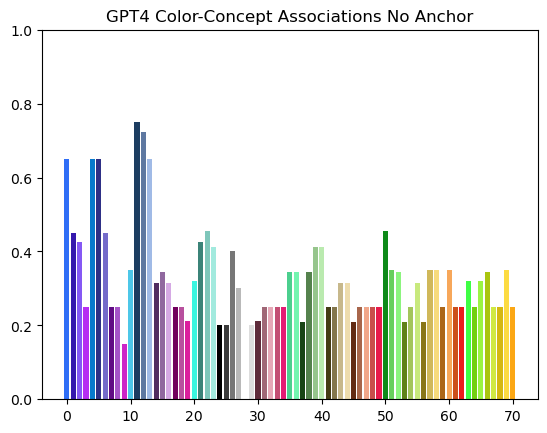

In [162]:
plt.bar(np.arange(71),gpt_assoc_noanchor_df[gpt_assoc_noanchor_df.concept=='justice'].iloc[:,1:].values[0], color = uw71coords.color_hex.values)
plt.ylim([0,1])
plt.title('GPT4 Color-Concept Associations No Anchor')

Text(0.5, 1.0, 'GPT4 Color-Concept Associations Anchor')

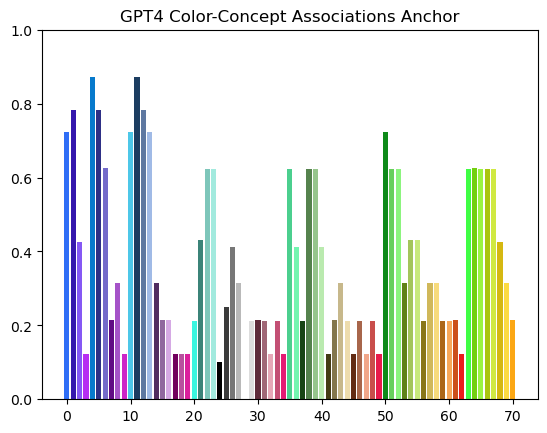

In [163]:
### anchoring
plt.bar(np.arange(71),gpt_assoc_anchor_df[gpt_assoc_anchor_df.concept=='justice'].iloc[:,1:].values[0], color = uw71coords.color_hex.values)
plt.ylim([0,1])
plt.title('GPT4 Color-Concept Associations Anchor')

Text(0.5, 1.0, 'GPT4 Color-Concept Associations Multiple')

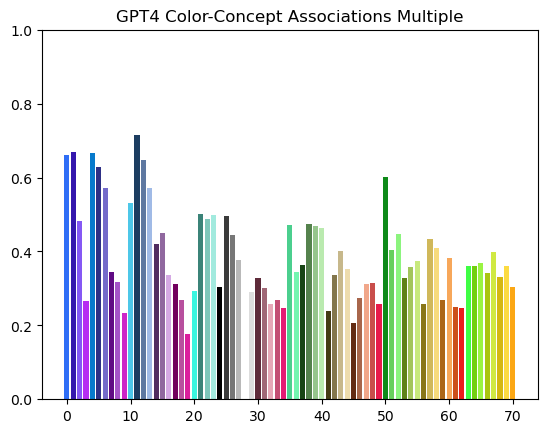

In [164]:
plt.bar(np.arange(71),gpt_assoc_multiple_grouped[gpt_assoc_multiple_grouped.concept=='justice'].iloc[:,1:].values[0], color = uw71coords.color_hex.values)
plt.ylim([0,1])
plt.title('GPT4 Color-Concept Associations Multiple')

Text(0.5, 1.0, 'Human Color-Concept Associations')

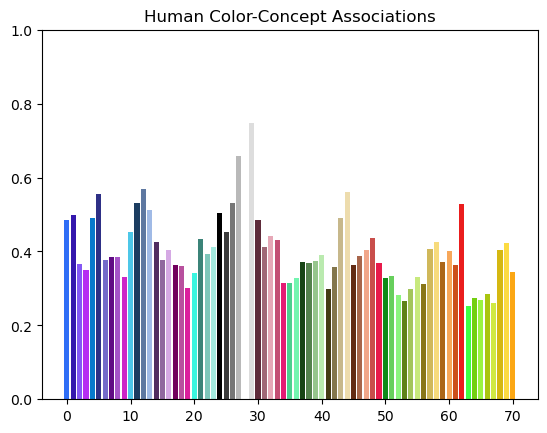

In [167]:
plt.bar(np.arange(71),ratings_all[ratings_all.index=='justice'].values[0], color = uw71coords.color_hex.values)
plt.ylim([0,1])
plt.title('Human Color-Concept Associations')

In [ ]:
plt.scatter(gpt_assoc_anchor_df[ratings_all.index=='happy'].values[0],gpt_assoc_noanchor_df[gpt_assoc_noanchor_df.index=='happy'].values[0], color = uw71coords.color_hex.values)
plt.ylim([0,1])
plt.xlim([0,1])
plt.xlabel('Human')
plt.ylabel('No Anchor')

,concept,0,1,2,3,4,5,6,7,8,...,61,62,63,64,65,66,67,68,69,70
0,above,0.427,0.650,0.405,0.145,0.441,0.577,0.448,0.337,0.367,...,0.231,0.297,0.483,0.413,0.316,0.123,0.210,0.307,0.215,0.472
1,above,0.244,0.482,0.166,0.265,0.639,0.457,0.365,0.251,0.223,...,0.211,0.082,0.536,0.383,0.432,0.319,0.128,0.247,0.351,0.378
2,above,0.352,0.235,0.454,0.192,0.783,0.345,0.489,0.234,0.342,...,0.190,0.188,0.260,0.351,0.315,0.347,0.578,0.419,0.537,0.492
3,above,0.675,0.239,0.782,0.167,0.642,0.420,0.385,0.281,0.082,...,0.271,0.167,0.392,0.405,0.487,0.442,0.401,0.290,0.096,0.109
4,above,0.234,0.281,0.438,0.351,0.386,0.258,0.356,0.027,0.418,...,0.408,0.053,0.210,0.209,0.287,0.413,0.421,0.362,0.498,0.274
5,above,0.350,0.212,0.340,0.324,0.587,0.250,0.453,0.340,0.211,...,0.100,0.250,0.425,0.216,0.123,0.432,0.322,0.350,0.169,0.408
6,above,0.462,0.433,0.456,0.150,0.543,0.219,0.262,0.345,0.210,...,0.232,0.391,0.230,0.376,0.423,0.214,0.317,0.300,0.530,0.332
7,above,0.543,0.280,0.458,0.212,0.359,0.347,0.305,0.210,0.222,...,0.204,0.198,0.231,0.254,0.649,0.214,0.473,0.424,0.326,0.342
8,above,0.234,0.290,0.622,0.456,0.721,0.432,0.321,0.050,0.452,...,0.212,0.123,0.598,0.462,0.510,0.429,0.438,0.485,0.425,0.257
9,above,0.440,0.123,0.438,0.376,0.652,0.231,0.462,0.352,0.183,...,0.251,0.135,0.345,0.314,0.394,0.350,0.342,0.327,0.287,0.202


In [208]:

### group by concept in gpt_assoc_multiple and take the mean of the first 2 rows in each group
cons=[]
cors=[]
num_ratings = []
for i in range(10):
    grouped_df = gpt_assoc_multiple.groupby('concept').apply(lambda x: x.head(i+1).mean()).reset_index()
    for this_concept in grouped_df.concept:
        cons.append(this_concept)
        cors.append(pearsonr(grouped_df[grouped_df.concept==this_concept].iloc[:,1:].values[0],ratings_all[ratings_all.index==this_concept].values[0])[0])
        num_ratings.append(i+1)
multirate_plot_df = pd.DataFrame({'concept':cons,'r':cors,'num_ratings':num_ratings}) 



Text(0.5, 0, 'Number of ratings')

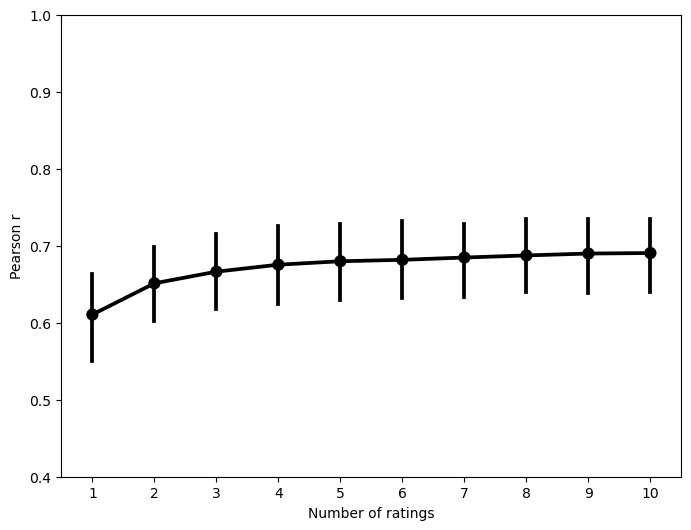

In [215]:
multirate_plot_df
plt.figure(figsize=(8,6))
sns.pointplot(x='num_ratings',y='r',data=multirate_plot_df, color='black')
plt.ylim([.4,1])
plt.ylabel('Pearson r')
plt.xlabel('Number of ratings')

In [171]:
cons =[]
cors_noanchor = []
cors_anchor = []
cors_multiple = []
spec=[]
for this_concept in gpt_assoc_df.index:
    cons.append(this_concept)
    cors_noanchor.append(pearsonr(gpt_assoc_noanchor_df[gpt_assoc_noanchor_df.concept==this_concept].iloc[:,1:].values[0],ratings_all[ratings_all.index==this_concept].values[0])[0])
    cors_anchor.append(pearsonr(gpt_assoc_anchor_df[gpt_assoc_anchor_df.concept==this_concept].iloc[:,1:].values[0],ratings_all[ratings_all.index==this_concept].values[0])[0])
    cors_multiple.append(pearsonr(gpt_assoc_multiple_grouped[gpt_assoc_multiple_grouped.concept==this_concept].iloc[:,1:].values[0],ratings_all[ratings_all.index==this_concept].values[0])[0])

    spec.append(1/entropy(ratings_all[ratings_all.index==this_concept].values[0]))
gpt_cor_df = pd.DataFrame({'concept':cons,'cor_noanchor':cors_noanchor,'cor_anchor': cors_anchor,'cor_multiple':cors_multiple,'specificity':spec})


mean correlation: 0.6662547658756297


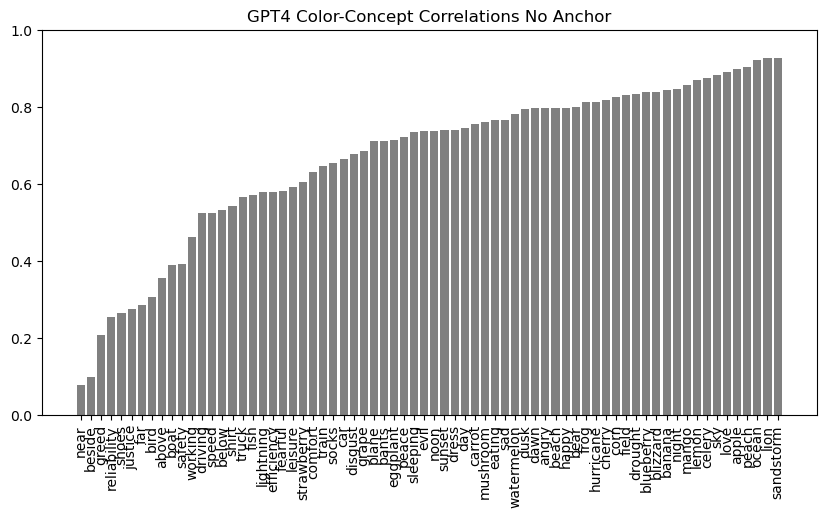

In [178]:
### sort gpt_cor_df by the correlation values and plot them as a barplot
plt.figure(figsize=(10,5))
gpt_cor_df.sort_values(by='cor_noanchor', inplace=True)
plt.bar(np.arange(70),gpt_cor_df.cor_noanchor.values, color='grey')
plt.ylim(0,1)
plt.xticks(np.arange(70),gpt_cor_df.concept.values, rotation=90)
plt.title('GPT4 Color-Concept Correlations No Anchoring')
print('mean correlation:',gpt_cor_df.cor_noanchor.mean())

mean correlation: 0.6583742648465544


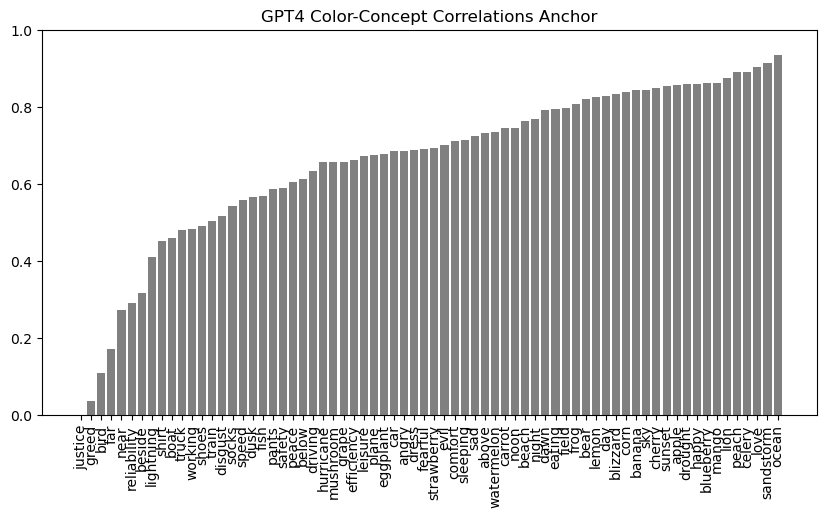

In [179]:
### sort gpt_cor_df by the correlation values and plot them as a barplot
plt.figure(figsize=(10,5))
gpt_cor_df.sort_values(by='cor_anchor', inplace=True)
plt.bar(np.arange(70),gpt_cor_df.cor_anchor.values, color='grey')
plt.ylim(0,1)
plt.xticks(np.arange(70),gpt_cor_df.concept.values, rotation=90)
plt.title('GPT4 Color-Concept Correlations Anchored')
print('mean correlation:',gpt_cor_df.cor_anchor.mean())

mean correlation: 0.6905070060900126


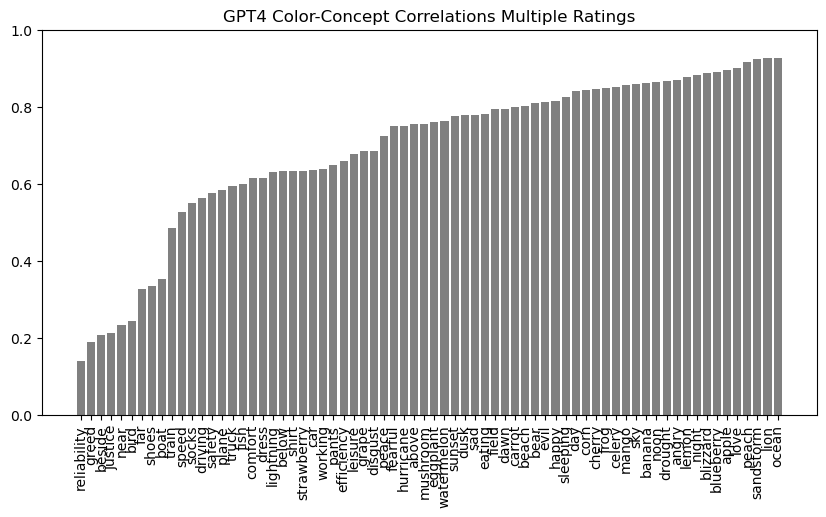

In [180]:
### sort gpt_cor_df by the correlation values and plot them as a barplot
plt.figure(figsize=(10,5))
gpt_cor_df.sort_values(by='cor_multiple', inplace=True)
plt.bar(np.arange(70),gpt_cor_df.cor_multiple.values, color='grey')
plt.ylim(0,1)
plt.xticks(np.arange(70),gpt_cor_df.concept.values, rotation=90)
plt.title('GPT4 Color-Concept Correlations Multiple Ratings')
print('mean correlation:',gpt_cor_df.cor_multiple.mean())

In [186]:

### pivot gpt_cor_df into long format where the column names cor_noanchor, cor_anchor, and cor_multiple are values in a column called 'cor_type' and the values in each go into a column called 'cor'

gpt_cor_df_long = pd.melt(gpt_cor_df, id_vars=['concept','specificity'], value_vars=['cor_noanchor','cor_anchor','cor_multiple'], var_name='cor_type', value_name='cor')
gpt_cor_df_long.head()

,concept,specificity,cor_type,cor
0,near,0.235032,cor_noanchor,0.076745
1,beside,0.234814,cor_noanchor,0.098796
2,greed,0.237560,cor_noanchor,0.208179
3,reliability,0.235128,cor_noanchor,0.252390
4,shoes,0.238806,cor_noanchor,0.264126


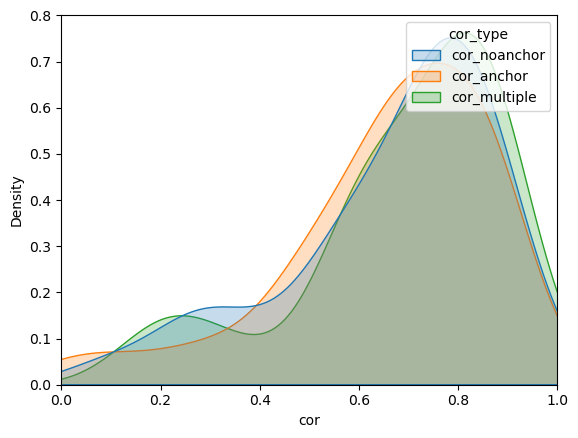

In [199]:
sns.kdeplot(x='cor', hue='cor_type',data=gpt_cor_df_long, fill=True)
plt.xlim(0,1)
### move the seaborn legend in the top left
plt.show()

Text(0.5, 1.0, 'GPT4 Color-Concept Correlations Anchor & No Anchor')

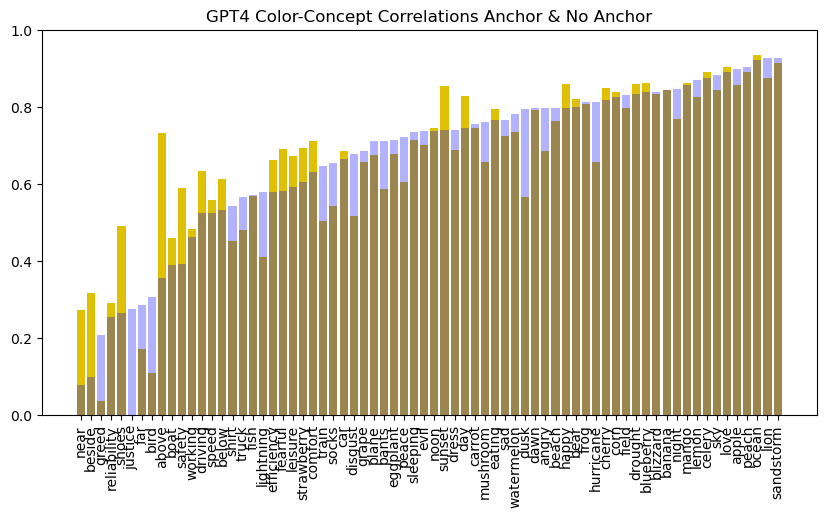

In [216]:
### split half cors


g1_subs = np.random.choice(set_1_raw[set_1_raw.prompt=='happy'].subject_id, 25, replace=False)
g2_subs = np.setdiff1d(set_1_raw[set_1_raw.prompt=='happy'].subject_id, g1_subs)
g1_grouped = set_1_raw[set_1_raw.subject_id.isin(g1_subs)].groupby(['concept','prompt','color_index']).response.agg(mean_rating = 'mean', se ='sem').reset_index()
g2_grouped = set_1_raw[set_1_raw.subject_id.isin(g2_subs)].groupby(['concept','prompt','color_index']).response.agg(mean_rating = 'mean', se ='sem').reset_index()
g1_ratings = make_ratings_mat(g1_grouped)[0]
g2_ratings = make_ratings_mat(g2_grouped)[0]

g1_happy = g1_ratings[g1_ratings.index=='happy']
g2_happy = g2_ratings[g2_ratings.index=='happy']

## compute the correlation between g1_happy and g2_happy with the spearman brown correction
corrected_sh = 2*pearsonr(g1_happy.values[0],g2_happy.values[0])[0]/(1+pearsonr(g1_happy.values[0],g2_happy.values[0])[0])
corrected_sh

0.9845966821577824

In [217]:
all_raw = pd.concat([set_1_raw,set_2_raw,set_3_raw])
corrected_shs = []
con=[]
for i in range(30):
    for this_concept in ratings_all.index:
        this_concept_ratings = all_raw[all_raw.prompt==this_concept]
        sub_1 = np.random.choice(this_concept_ratings.subject_id.unique(), int(this_concept_ratings.subject_id.nunique()/2), replace=False)
        sub_2 = np.setdiff1d(this_concept_ratings.subject_id, sub_1)
        g1_grouped = this_concept_ratings[this_concept_ratings.subject_id.isin(sub_1)].groupby(['concept','prompt','color_index']).response.agg(mean_rating = 'mean', se ='sem').reset_index()
        g2_grouped = this_concept_ratings[this_concept_ratings.subject_id.isin(sub_2)].groupby(['concept','prompt','color_index']).response.agg(mean_rating = 'mean', se ='sem').reset_index()
        g1_ratings = make_ratings_mat(g1_grouped)[0]
        g2_ratings = make_ratings_mat(g2_grouped)[0]
        con.append(this_concept)
        corrected_shs.append(2*pearsonr(g1_ratings.values[0],g2_ratings.values[0])[0]/(1+pearsonr(g1_ratings.values[0],g2_ratings.values[0])[0]))



In [ ]:
sh_df = pd.DataFrame({'concept':con,'sh':corrected_shs})
mean_sh_df = sh_df.groupby('concept').sh.agg(mean_sh='mean').reset_index()
mean_sh_df=mean_sh_df.sort_values(by='mean_sh', ascending=True)
concept_order = {concept: i for i, concept in enumerate(mean_sh_df.sort_values(by='mean_sh', ascending=True).concept.values)}

In [ ]:

plt.figure(figsize=(10,5))
### sort sh_df by concept and do it in the order of the concept_order dictionary
sh_df['order'] = sh_df.concept.map(concept_order)
sh_df.sort_values(by='order', inplace=True)



sns.barplot(x='concept', y='sh',data=sh_df, color='grey')
plt.ylim(0,1)
### rotate the xticks by 90 degrees
plt.xticks(rotation=90)
plt.title('Human Color-Concept Split Half Correlations')

In [ ]:
spearmanr(mean_sh_df.concept.values, gpt_cor_df.concept.values)

In [ ]:
pearsonr(mean_sh_df.sort_values(by='concept').mean_sh.values, gpt_cor_df.sort_values(by='concept').cor.values)

In [ ]:
gpt_cor_df.sort_values(by='concept',inplace=True)
mean_sh_df.sort_values(by='concept',inplace=True)
gpt_cor_df['cor'] = gpt_cor_df.cor/mean_sh_df.mean_sh

In [ ]:
plt.figure(figsize=(10,5))
gpt_cor_df.sort_values(by='cor', inplace=True)
plt.bar(np.arange(70),gpt_cor_df.cor.values, color='grey')
plt.ylim(0,1)
plt.xticks(np.arange(70),gpt_cor_df.concept.values, rotation=90)
plt.title('GPT4 Color-Concept Correlations')